In [128]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler



import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [129]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/DIABETES.csv", engine = "python", encoding="CP949")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [130]:
df_raw.shape

(442, 11)

In [131]:
df_raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [132]:
df_raw.describe()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,152.133484,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,77.093005,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,25.000000,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,87.000000,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,140.500000,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,211.500000,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,346.000000,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


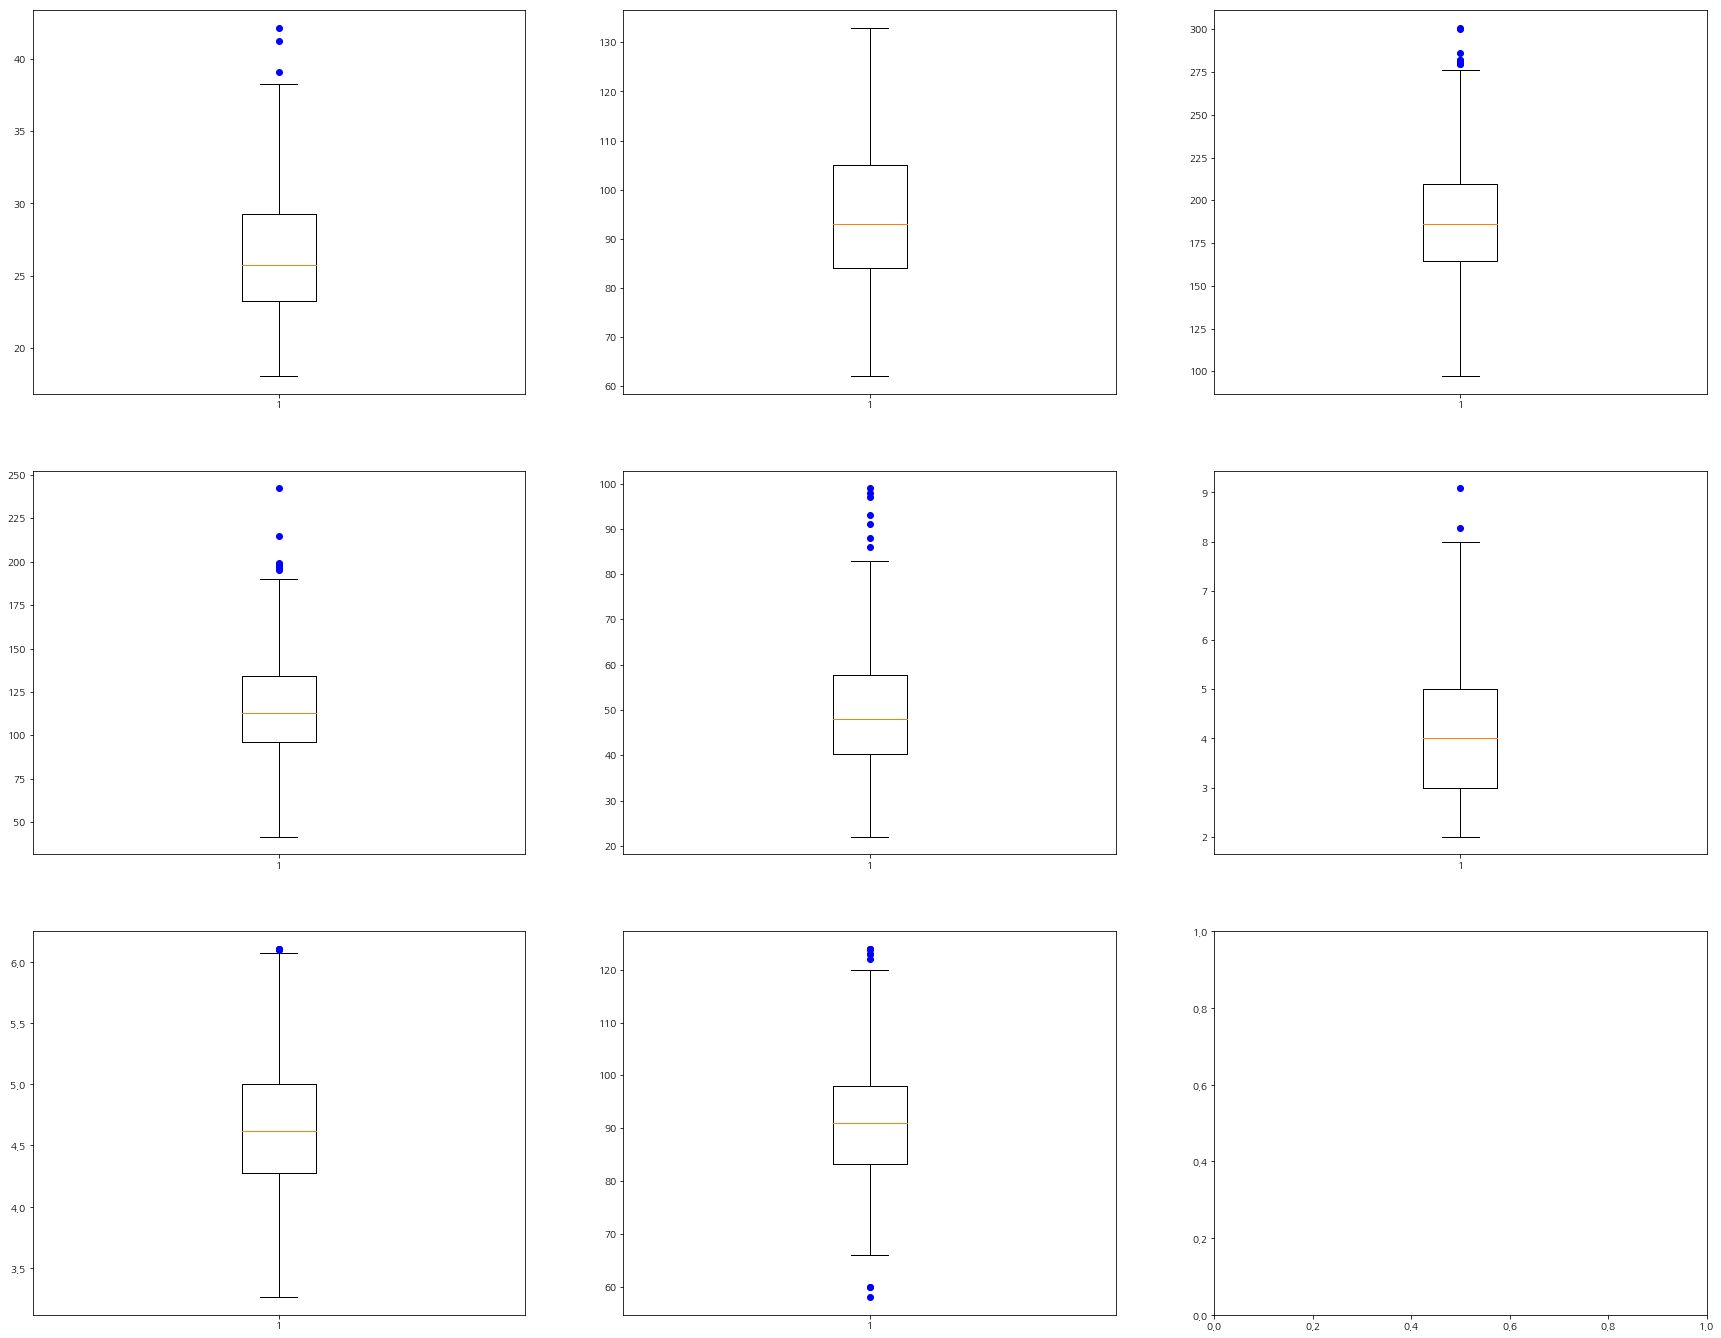

In [133]:
f, ax = plt.subplots(3, 3, figsize=(30, 24))
ax[0, 0].boxplot(df_raw['BMI'], sym="bo")
ax[0, 1].boxplot(df_raw['BP'], sym="bo")
ax[0, 2].boxplot(df_raw['CHOLESTEROL'], sym="bo")
ax[1, 0].boxplot(df_raw['LDL'], sym="bo")
ax[1, 1].boxplot(df_raw['HDL'], sym="bo")
ax[1, 2].boxplot(df_raw['TCH'], sym="bo")
ax[2, 0].boxplot(df_raw['LTG'], sym="bo")
ax[2, 1].boxplot(df_raw['GLUCOSE'], sym="bo")
plt.show()

In [149]:
#열 데이터 대체 구문
for x in df_raw.columns:
    print(x)
    if x == 'Y' or x == 'GENDER':
        break
    else:
        a = np.percentile(df_raw[x],[25,75])
        l = a[1] + 1.5*(a[1]-a[0])
        df_raw[x][df_raw[x]>l] = l 

Y


In [151]:
a= np.percentile(df_raw[x],[25,75])
a[1] + 1.5*(a[1]-a[0])

350.5

In [134]:
#df_row[변수].loc[df_raw[변수]>=IQR],[변수]]=1.5IQR
df_BMI_IQR = 1.5 * (df_raw.describe().round(3)['BMI']['75%']-df_raw.describe().round(3)['BMI']['25%'])
df_CHOLESTEROL_IQR = 1.5 * (df_raw.describe().round(3)['CHOLESTEROL']['75%']-df_raw.describe().round(3)['CHOLESTEROL']['25%'])
df_LDL_IQR = 1.5 * (df_raw.describe().round(3)['LDL']['75%']-df_raw.describe().round(3)['LDL']['25%'])
df_HDL_IQR = 1.5 * (df_raw.describe().round(3)['HDL']['75%']-df_raw.describe().round(3)['HDL']['25%'])
df_TCH_IQR = 1.5 * (df_raw.describe().round(3)['TCH']['75%']-df_raw.describe().round(3)['TCH']['25%'])
df_LTG_IQR = 1.5 * (df_raw.describe().round(3)['LTG']['75%']-df_raw.describe().round(3)['LTG']['25%'])


df_BMI_up = df_BMI_IQR + df_raw.describe().round(3)['BMI']['75%']
df_CHOLESTEROL_up = df_CHOLESTEROL_IQR + df_raw.describe().round(3)['CHOLESTEROL']['75%']
df_LDL_up = df_LDL_IQR + df_raw.describe().round(3)['LDL']['75%']
df_HDL_up = df_HDL_IQR + df_raw.describe().round(3)['HDL']['75%']
df_TCH_up = df_TCH_IQR + df_raw.describe().round(3)['TCH']['75%']
df_LTG_up = df_LTG_IQR + df_raw.describe().round(3)['LTG']['75%']


df_BMI_down = df_raw.describe().round(3)['BMI']['75%'] - df_BMI_IQR
df_CHOLESTEROL_down = df_raw.describe().round(3)['CHOLESTEROL']['75%'] - df_CHOLESTEROL_IQR
df_LDL_down = df_raw.describe().round(3)['LDL']['75%'] - df_LDL_IQR
df_HDL_down = df_raw.describe().round(3)['HDL']['75%'] - df_HDL_IQR
df_TCH_down = df_raw.describe().round(3)['TCH']['75%'] - df_TCH_IQR
df_LTG_down = df_raw.describe().round(3)['LTG']['75%'] - df_LTG_IQR

df_raw[df_raw['BMI'] > df_BMI_up] = df_BMI_up
df_raw[df_raw['CHOLESTEROL'] > df_CHOLESTEROL_up] = df_CHOLESTEROL_up
df_raw[df_raw['LDL'] > df_LDL_up] = df_LDL_up
df_raw[df_raw['HDL'] > df_HDL_up] = df_HDL_up
df_raw[df_raw['TCH'] > df_TCH_up] = df_TCH_up
df_raw[df_raw['LTG'] > df_LTG_up] = df_LTG_up

df_raw[df_raw['BMI'] < df_BMI_down] = df_BMI_down
df_raw[df_raw['CHOLESTEROL'] < df_CHOLESTEROL_down] = df_CHOLESTEROL_down
df_raw[df_raw['LDL'] < df_LDL_down] = df_LDL_down
df_raw[df_raw['HDL'] < df_HDL_down] = df_HDL_down
df_raw[df_raw['TCH'] < df_TCH_down] = df_TCH_down
df_raw[df_raw['LTG'] < df_LTG_down] = df_LTG_down

In [135]:
df_out.reset_index(drop = True , inplace=True)
df_out

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
1,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
2,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
3,63,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92
4,110,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94
5,69,56,2,28.0,85.00,184,144.8,32.0,6.00,3.5835,77
6,179,53,1,23.7,92.00,186,109.2,62.0,3.00,4.3041,81
7,185,50,2,26.2,97.00,186,105.4,49.0,4.00,5.0626,88
8,118,61,1,24.0,91.00,202,115.4,72.0,3.00,4.2905,73
9,171,34,2,24.7,118.00,254,184.2,39.0,7.00,5.0370,81


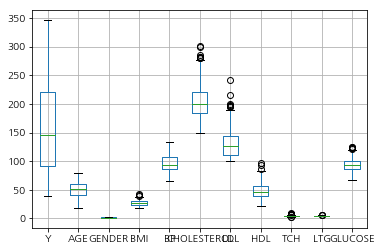

In [136]:
df_out.boxplot()

In [137]:
df_raw.corr(method = "pearson").round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.156,-0.060,0.060,0.506,0.544,0.475,0.055,-0.047,-0.048,0.453
AGE,0.156,1.000,0.901,0.940,0.767,0.040,0.501,0.931,0.906,0.906,0.807
GENDER,-0.060,0.901,1.000,0.985,0.538,-0.304,0.224,0.913,1.000,1.000,0.593
BMI,0.060,0.940,0.985,1.000,0.658,-0.161,0.352,0.946,0.987,0.987,0.707
BP,0.506,0.767,0.538,0.658,1.000,0.522,0.765,0.733,0.549,0.551,0.929
CHOLESTEROL,0.544,0.040,-0.304,-0.161,0.522,1.000,0.826,0.019,-0.288,-0.288,0.496
LDL,0.475,0.501,0.224,0.352,0.765,0.826,1.000,0.457,0.241,0.238,0.779
HDL,0.055,0.931,0.913,0.946,0.733,0.019,0.457,1.000,0.915,0.918,0.771
TCH,-0.047,0.906,1.000,0.987,0.549,-0.288,0.241,0.915,1.000,1.000,0.605
LTG,-0.048,0.906,1.000,0.987,0.551,-0.288,0.238,0.918,1.000,1.000,0.606


In [138]:
df_out.corr(method = "pearson").round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.111,0.021,0.563,0.392,0.167,0.137,-0.393,0.429,0.531,0.381
AGE,0.111,1.000,0.189,0.024,0.272,0.137,0.107,-0.069,0.102,0.188,0.228
GENDER,0.021,0.189,1.000,0.052,0.211,-0.013,0.111,-0.371,0.319,0.146,0.173
BMI,0.563,0.024,0.052,1.000,0.269,0.110,0.150,-0.343,0.329,0.342,0.336
BP,0.392,0.272,0.211,0.269,1.000,0.129,0.070,-0.171,0.172,0.334,0.329
CHOLESTEROL,0.167,0.137,-0.013,0.110,0.129,1.000,0.841,0.145,0.372,0.511,0.205
LDL,0.137,0.107,0.111,0.150,0.070,0.841,1.000,-0.176,0.563,0.251,0.193
HDL,-0.393,-0.069,-0.371,-0.343,-0.171,0.145,-0.176,1.000,-0.794,-0.346,-0.298
TCH,0.429,0.102,0.319,0.329,0.172,0.372,0.563,-0.794,1.000,0.556,0.362
LTG,0.531,0.188,0.146,0.342,0.334,0.511,0.251,-0.346,0.556,1.000,0.409


In [1]:
df_out_y = df_out["Y"]
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select=5).fit(df_out_x, df_out_y)

selected_cols = df_out_x.columns[rfe.support_]
removed_cols = df_out_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

NameError: name 'df_out' is not defined

In [140]:
#후진제거법 사용
reg_model = smf.ols(formula = "Y ~ BMI+BP+HDL+LTG", data=df_out)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     71.42
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.78e-42
Time:                        15:46:51   Log-Likelihood:                -1659.7
No. Observations:                 306   AIC:                             3329.
Df Residuals:                     301   BIC:                             3348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -305.2491     45.083     -6.771      0.0

In [141]:
# 설명변수 간의 다중공선성 확인 : 설명 변수 데이터 생서 및 상수항 추가
df_out_x=df_out.drop(["Y","GENDER","CHOLESTEROL","AGE","LDL", "TCH", "GLUCOSE"],axis=1)
#statsmodels의 상수항 추가 함수 적용
df_out_x_const=add_constant(df_out_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_out_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_out_x_const.values, i) for i in range(df_out_x_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
2,BP,1.161
3,HDL,1.216
1,BMI,1.245
4,LTG,1.298
0,const,203.170


In [142]:
reg_model = smf.ols(formula = "Y ~ C(GENDER)+BMI+BP+HDL+LTG", data=df_out)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     61.56
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           5.14e-44
Time:                        15:46:52   Log-Likelihood:                -1653.8
No. Observations:                 306   AIC:                             3320.
Df Residuals:                     300   BIC:                             3342.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -280.5559     44.871     -6.

In [143]:
# 설명변수 간의 다중공선성 확인 : 설명 변수 데이터 생서 및 상수항 추가
df_out_x=df_out.drop(["Y","GENDER","CHOLESTEROL","AGE"],axis=1)
#statsmodels의 상수항 추가 함수 적용
df_out_x_const=add_constant(df_out_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_out_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_out_x_const.values, i) for i in range(df_out_x_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
2,BP,1.225
1,BMI,1.287
7,GLUCOSE,1.350
6,LTG,1.889
3,LDL,2.212
4,HDL,4.383
5,TCH,7.380
0,const,267.402


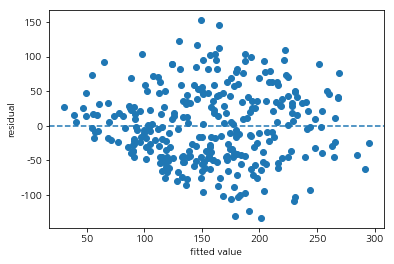

In [144]:
# 등분산성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

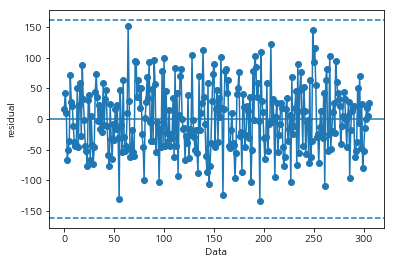

In [145]:
# 독립성 검정
plt.plot(df_out.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle = "--")

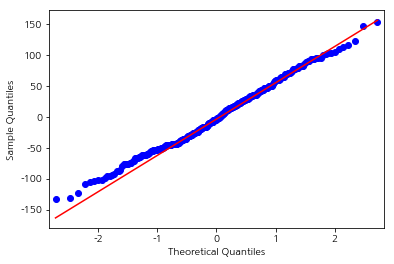

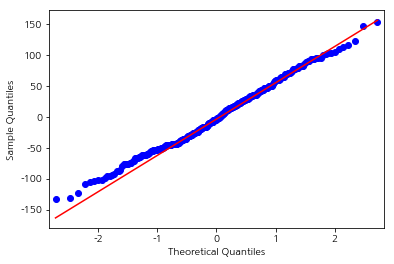

In [146]:
#정규성 검정
qqplot(reg_result.resid, line="q")

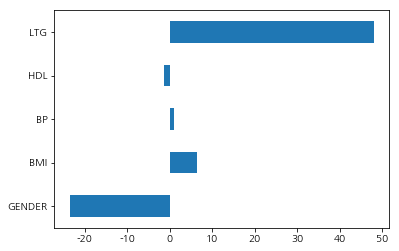

In [147]:
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]}, index = ["GENDER","BMI","BP","HDL","LTG"])
df_reg_coef.plot.barh(y="Coef", legend=False)

In [164]:
#Ridge Regression
from sklearn.linear_model import Ridge


df_raw_y = df_out["Y"]
df_raw_X = df_out.drop(["Y","GENDER","CHOLESTEROL","AGE","LDL", "TCH", "GLUCOSE"], axis=1)

clf = Ridge(alpha=1.0)
result = clf.fit(df_raw_X,df_raw_y)

df_ridge = pd.DataFrame()
df_ridge['variable'] = df_raw_X.columns
df_ridge['coef'] = pd.DataFrame(result.coef_)

print(df_ridge)
print(result.intercept_)


  variable       coef
0      BMI   6.795640
1       BP   0.966632
2      HDL  -0.828066
3      LTG  47.328681
-301.9731127906363


In [163]:
#LASSO Regression
from sklearn import linear_model

df_raw_y = df_out["Y"]
df_raw_X = df_out.drop(["Y","GENDER","CHOLESTEROL","AGE","LDL", "TCH", "GLUCOSE"], axis=1)

clf = linear_model.Lasso(alpha=1.0)
result = clf.fit(df_raw_X,df_raw_y)

df_ridge = pd.DataFrame()
df_ridge['variable'] = df_raw_X.columns
df_ridge['coef'] = pd.DataFrame(result.coef_)

print(df_ridge)
print(result.intercept_)

  variable       coef
0      BMI   6.841923
1       BP   1.004522
2      HDL  -0.869952
3      LTG  42.812444
-283.47504933556485


In [162]:
#Elastic Net Regression
from sklearn import linear_model

df_raw_y = df_out["Y"]
df_raw_X = df_out.drop(["Y","GENDER","CHOLESTEROL","AGE","LDL", "TCH", "GLUCOSE"], axis=1)

clf = linear_model.ElasticNet()
result = clf.fit(df_raw_X,df_raw_y)

df_Elastic = pd.DataFrame()
df_Elastic['variable'] = df_raw_X.columns
df_Elastic['coef'] = pd.DataFrame(result.coef_)

print(df_Elastic)
print(result.intercept_)

  variable       coef
0      BMI   7.316204
1       BP   1.281974
2      HDL  -1.176566
3      LTG  12.102032
-162.84343765299445
